# Lab: Binary classification with decision trees

**Author**: J. Hickman

The breast cancer dataset is a well studied binary classification dataset.

* Classes: 2
* Samples per class: 212(M),357(B)
* Samples total:569
* Dimensionality: 30
* Features: real, positive

The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is downloaded from: https://goo.gl/U2Uwz2

In this lab we will use the dataset to train a decision tree model. 

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

**Instructions** 
* Read and work through all tutorial content and do all exercises below
  
**Submission:**
* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

**For reference recall the following definitions**
* Accuracy classification score. In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
  
* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
  * The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.
* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
  * The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html


#### 4.1.0 Student information 

Please provide the following information 

In [1]:
# ## Name: Hannah Kim
# ## Date: Nov.12, 2023
# ## Class Section: DSAN 5000-01
# ## Lab Section: 01

#### Import

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#### 4.1.1: Import 

The following code will import the data file into a pandas data-frame

In [3]:
# LOAD THE DATAFRAME
from sklearn.datasets import load_breast_cancer
(x,y) = load_breast_cancer(return_X_y=True,as_frame=True)
df=pd.concat([x,y],axis=1)

# LOOK AT FIRST ROW
print(df.iloc[0])

mean radius                  17.990000
mean texture                 10.380000
mean perimeter              122.800000
mean area                  1001.000000
mean smoothness               0.118400
mean compactness              0.277600
mean concavity                0.300100
mean concave points           0.147100
mean symmetry                 0.241900
mean fractal dimension        0.078710
radius error                  1.095000
texture error                 0.905300
perimeter error               8.589000
area error                  153.400000
smoothness error              0.006399
compactness error             0.049040
concavity error               0.053730
concave points error          0.015870
symmetry error                0.030030
fractal dimension error       0.006193
worst radius                 25.380000
worst texture                17.330000
worst perimeter             184.600000
worst area                 2019.000000
worst smoothness              0.162200
worst compactness        

In [4]:
# INSERT CODE TO PRINT ITS SHAPE AND COLUMN NAMES
print(df.shape)
print(df.columns)

(569, 31)
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


#### 4.1.2: Basic data exploration

We will be using y="target" (output target) and all other remaining columns as our X (input feature) matrix. 

Before doing analysis it is always good to "get inside" the data and see what we are working with

In [5]:
#INSERT CODE TO PRINT THE FOLLOWING DATA-FRAME WHICH SUMMARIZES EACH COLUMN 
summary = df.describe().transpose()

result = pd.DataFrame({
    'dtypes': df.dtypes,
    'min': summary['min'],
    'mean': summary['mean'],
    'max': summary['max']
})
print(result)

                          dtypes         min        mean         max
mean radius              float64    6.981000   14.127292    28.11000
mean texture             float64    9.710000   19.289649    39.28000
mean perimeter           float64   43.790000   91.969033   188.50000
mean area                float64  143.500000  654.889104  2501.00000
mean smoothness          float64    0.052630    0.096360     0.16340
mean compactness         float64    0.019380    0.104341     0.34540
mean concavity           float64    0.000000    0.088799     0.42680
mean concave points      float64    0.000000    0.048919     0.20120
mean symmetry            float64    0.106000    0.181162     0.30400
mean fractal dimension   float64    0.049960    0.062798     0.09744
radius error             float64    0.111500    0.405172     2.87300
texture error            float64    0.360200    1.216853     4.88500
perimeter error          float64    0.757000    2.866059    21.98000
area error               float64  

In [6]:
# INSERT CODE TO EXPLORE THE LOAD BALANCE AND COUNT THE NUMBER OF SAMPLES FOR EACH TARGET (THEN PRINT THE RESULT)
# percentage
for i in range(0,2):
    print(f"Number of points with target =", i, ": ", df['target'].value_counts()[i], df['target'].value_counts()[i]/len(df))

Number of points with target = 0 :  212 0.37258347978910367
Number of points with target = 1 :  357 0.6274165202108963


(31, 31)


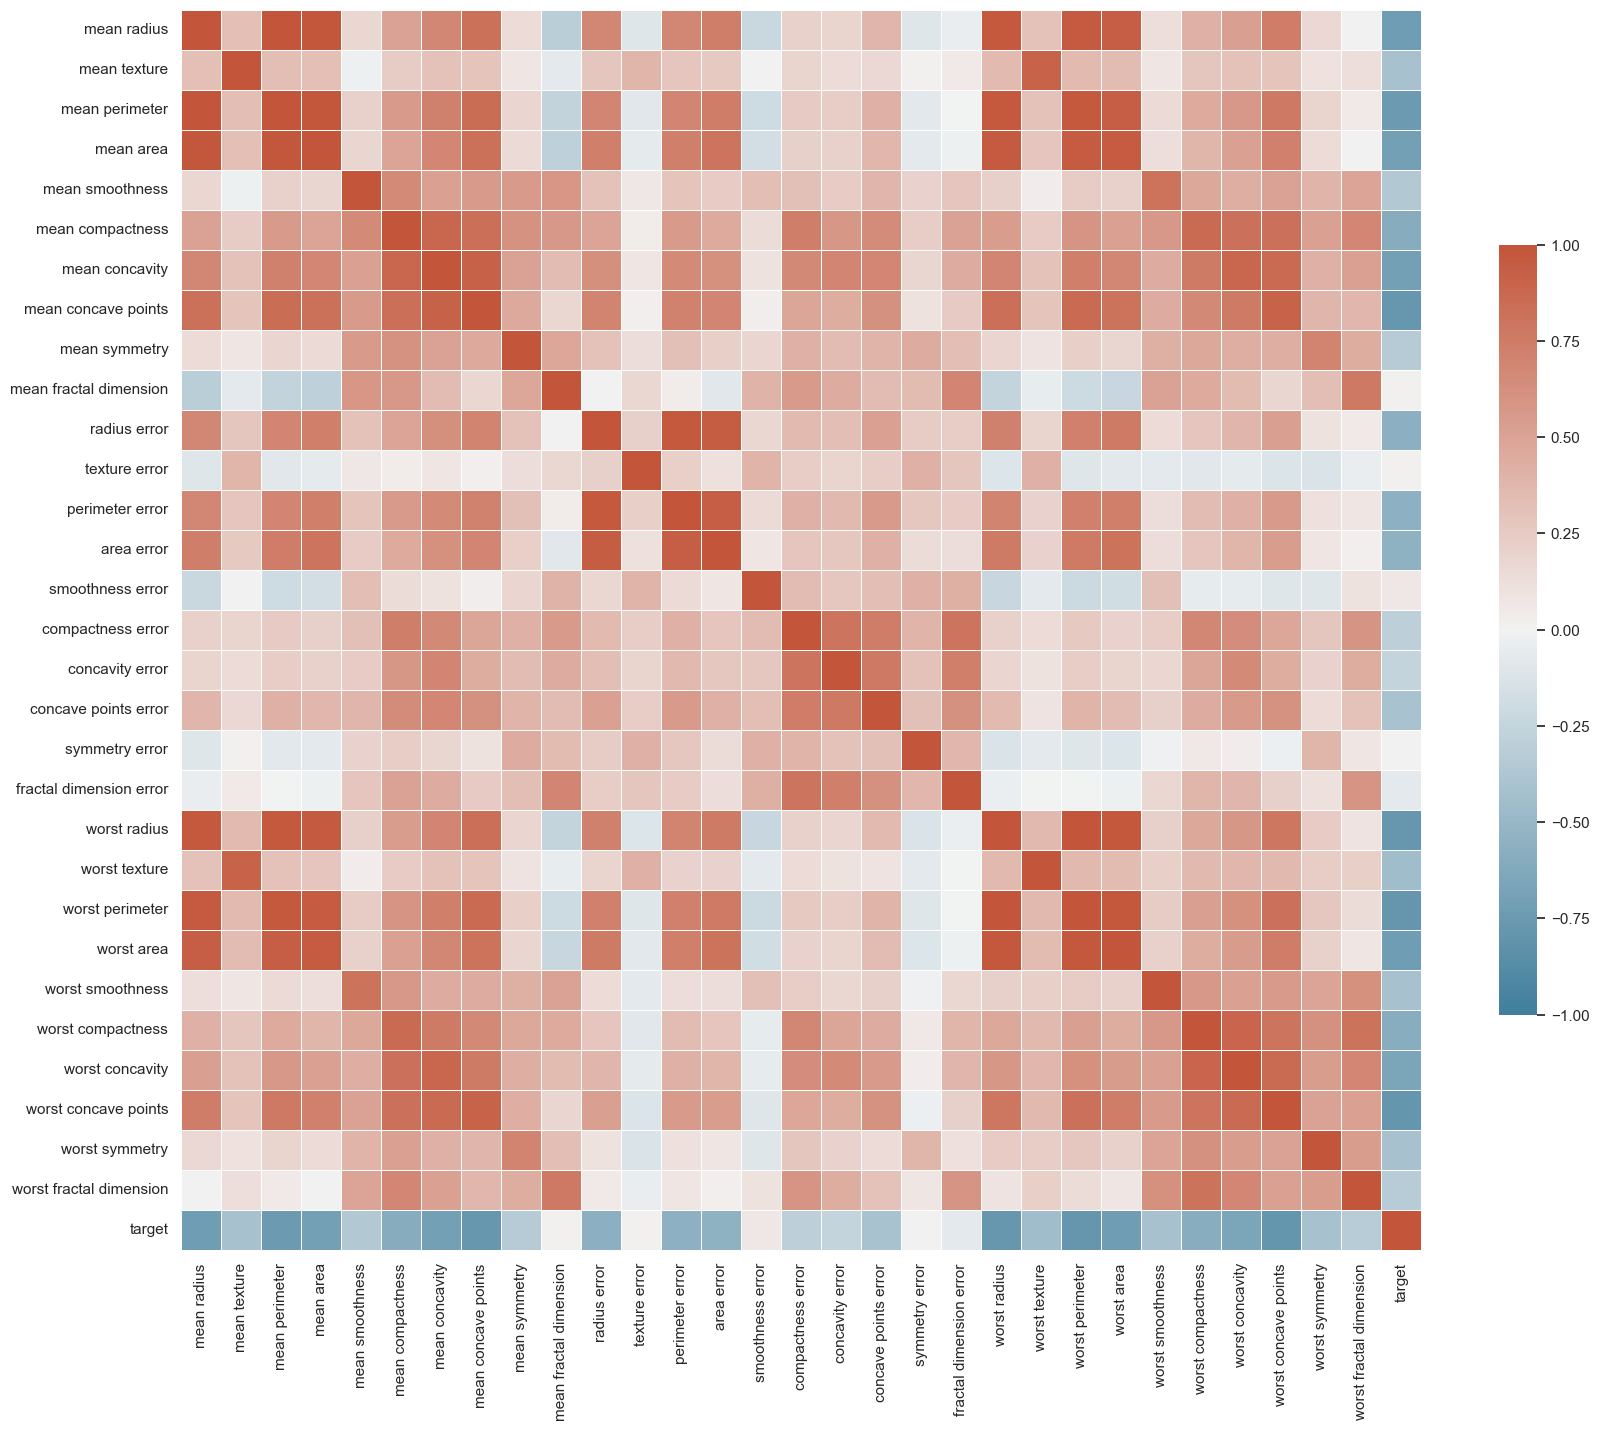

In [7]:
# RUN THE FOLLOWING CODE TO SHOW THE HEAT-MAP FOR THE CORRELATION MATRIX
corr = df.corr();  #print(corr)	#COMPUTE CORRELATION OF FEATER MATRIX
print(corr.shape)

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

When the dataset is very large then the seaborn pairplot is often very slow. 

However, in this case it can still be useful to look at a subset of the features

(569, 11)


/Users/hannahkim/opt/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


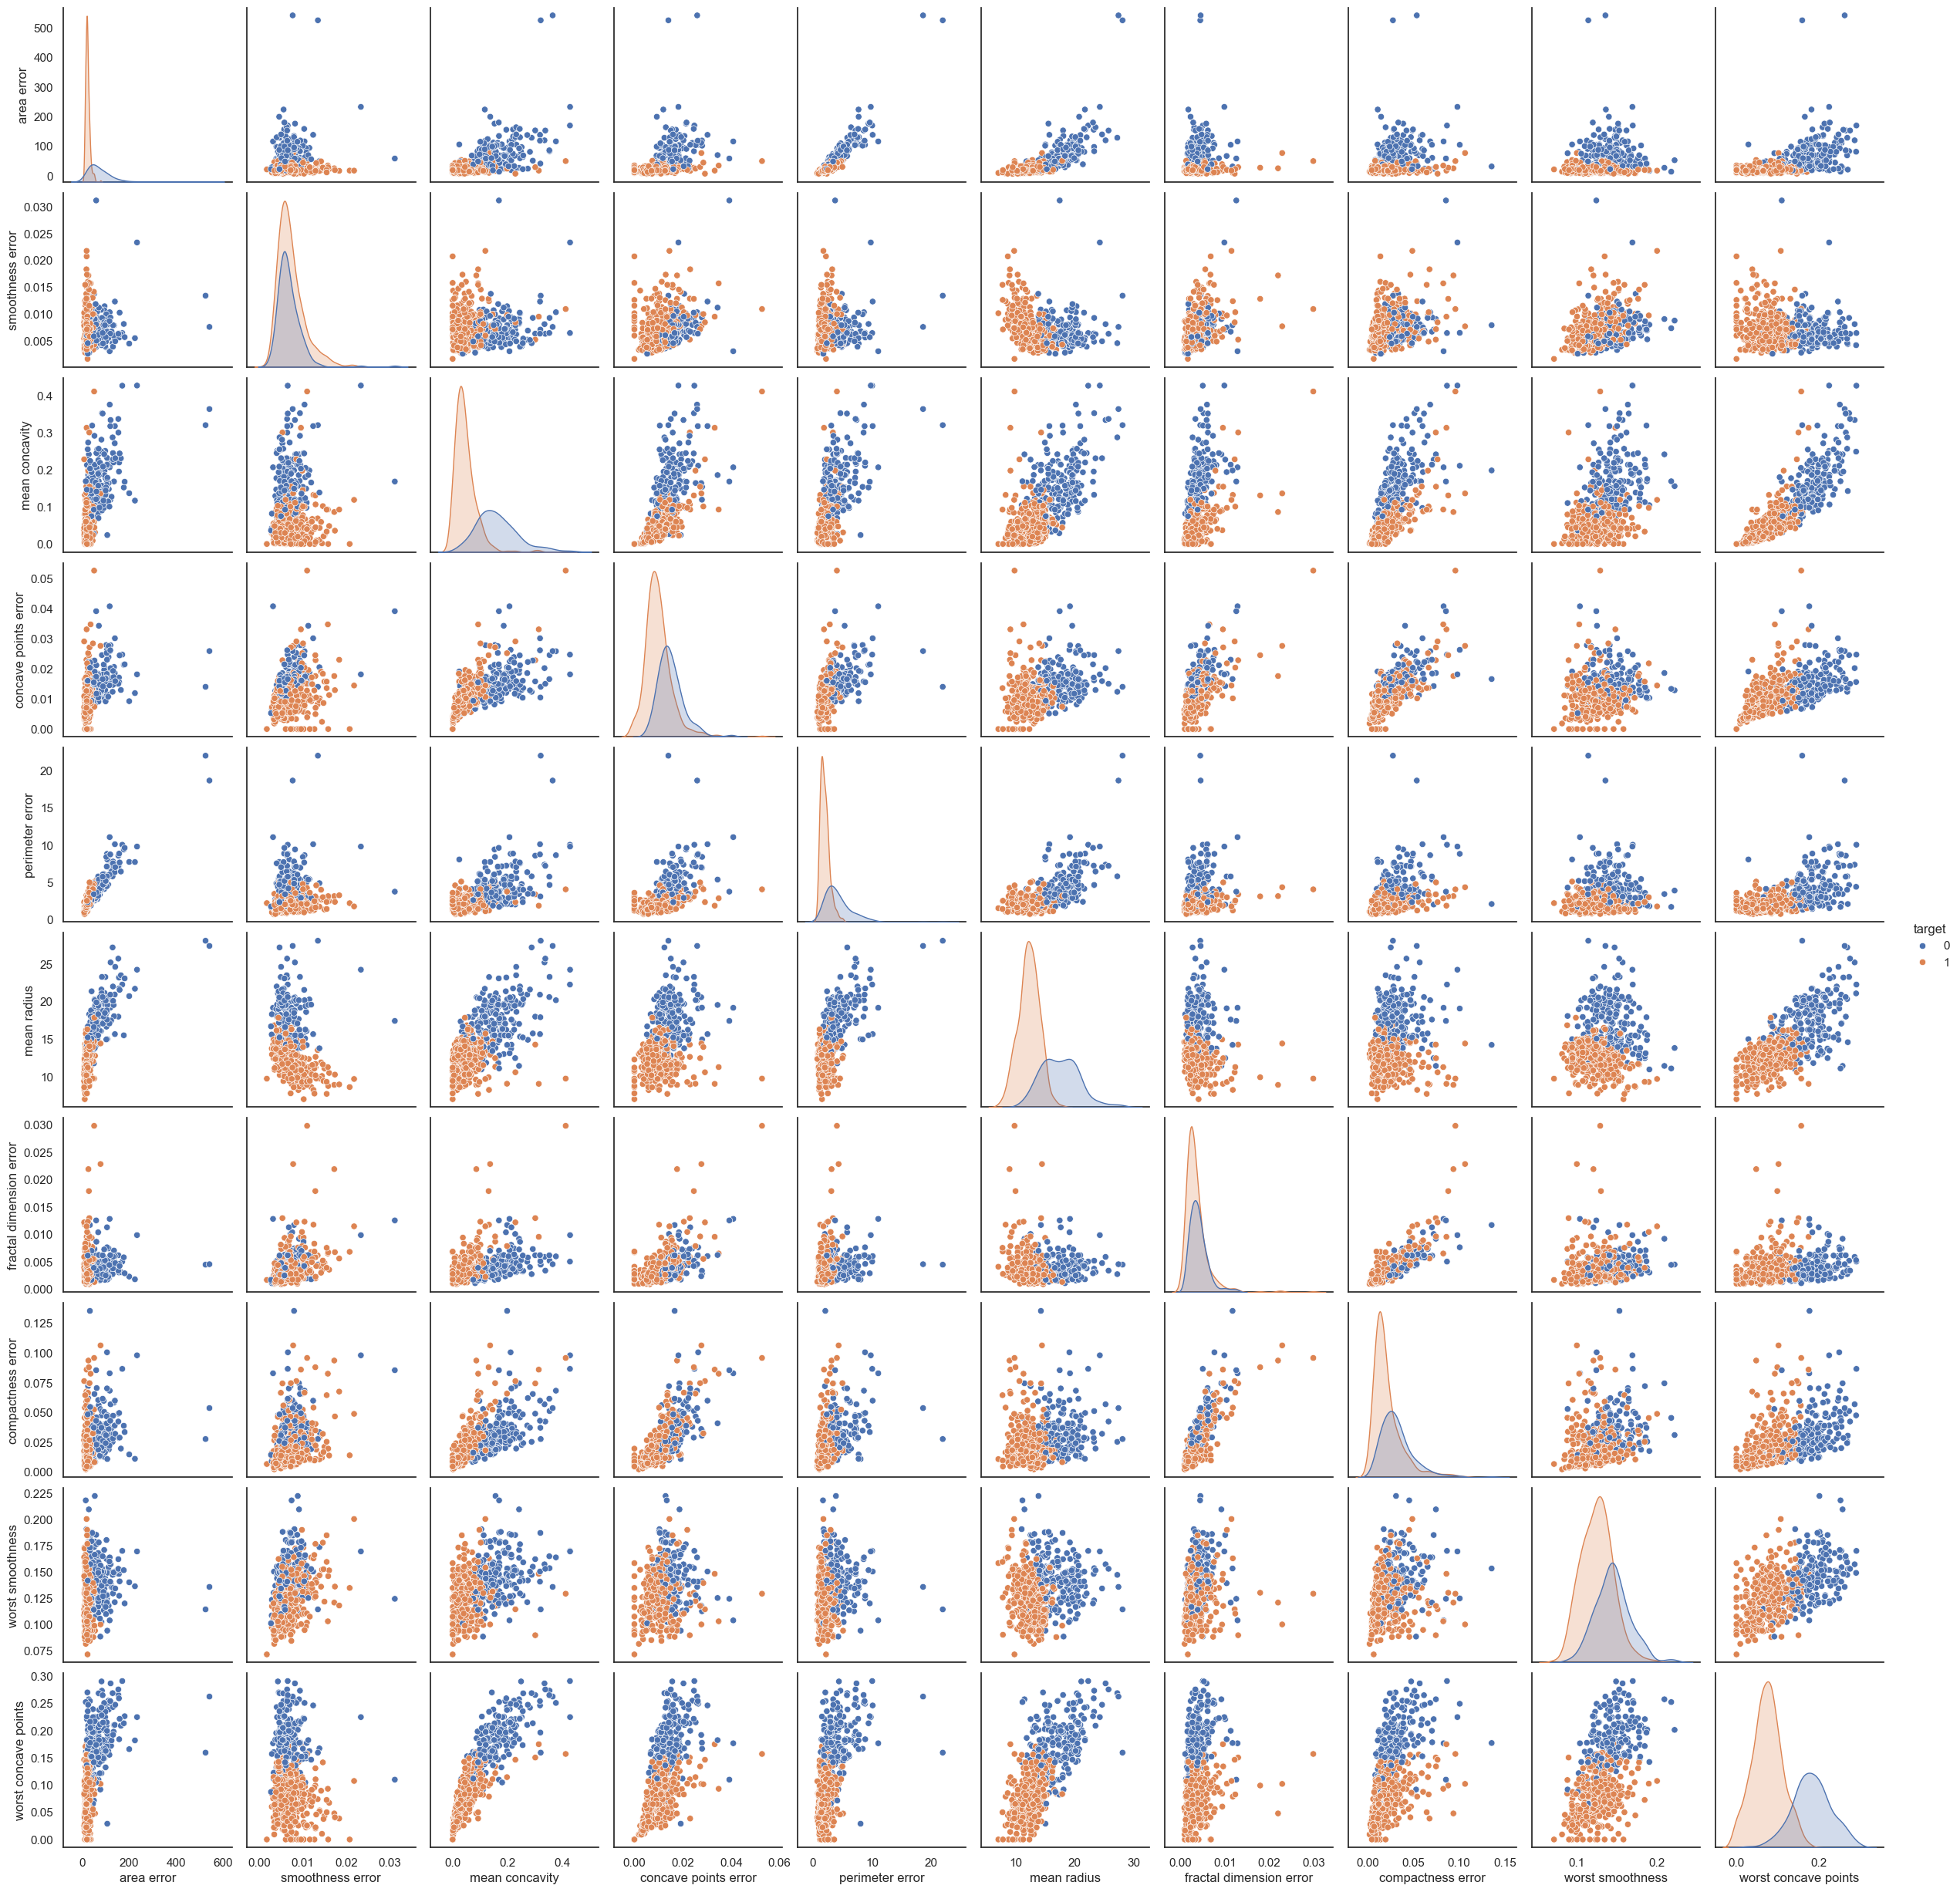

In [8]:
# # RUN THE FOLLOWING CODE TO GENERATE A SEABORN PAIRPLOT 
tmp=pd.concat([df.sample(n=10,axis=1),y],axis=1)
print(tmp.shape)
sns.pairplot(tmp,hue="target", diag_kind='kde')
plt.show()

 #### 4.1.3  Isolate inputs/output & Split data

In [9]:
# INSERT CODE TO MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="target" COLUMN and X="everything else"
y = df.target                           # assign the target column first in y variable
x = df.drop(['target'], axis = 1)       # assign everything else except for the target column in x variable

df2 = pd.DataFrame(x,y)

In [10]:
# print out the shape of the data frame; double check
print(df2.shape)
df2

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890


In [11]:
# INSERT CODE TO PARTITION THE DATASET INTO TRAINING AND TEST SETS

# sklearn; train and test package added
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [12]:
# INSERT CODE, AS A CONSISTENCY CHECK, TO PRINT THE TYPE AND SHAPE OF x_train, x_test, y_train, y_test
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'pandas.core.frame.DataFrame'> (455, 30)
<class 'pandas.core.series.Series'> (455,)
<class 'pandas.core.frame.DataFrame'> (114, 30)
<class 'pandas.core.series.Series'> (114,)


 #### 4.1.4  Training the model

In [14]:
#### INSERT CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train) # train and model learns the x and y and corr

 #### 4.1.5  Check the results 

Evaluate the performance of the decision tree model by using the test data. 

In [25]:
# INSERT CODE TO USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

(455,) (455,)


Use the following reference to display the confusion matrix.
 [SKlearn Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) will give you the code you need. 

 In the function below, also print the following as part of the function output
 ```
ACCURACY: 0.9035087719298246
NEGATIVE RECALL (Y=0): 0.9574468085106383
NEGATIVE PRECISION (Y=0): 0.8333333333333334
POSITIVE RECALL (Y=1): 0.8656716417910447
POSITIVE PRECISION (Y=1): 0.9666666666666667
[[45  2]
 [ 9 58]]
 ```

In [32]:
#INSERT CODE TO WRITE A FUNCTION def confusion_plot(y_data,y_pred) WHICH GENERATES A CONFUSION MATRIX PLOT AND PRINTS THE INFORMATION ABOVE (see link above for example)

def confusion_plot(y_data, y_pred):
    print("ACCURACY:", accuracy_score(y_data,y_pred))
    
    tn, fp, fn, tp = confusion_matrix(y_data, y_pred).ravel()
    specificity = tn / (tn+fp)
    print("NEGATIVE RECALL (Y=0):", specificity) # specificity
    print("NEGATIVE PRECISION (Y=0):", tn/(tn+fn))
    print("POSITIVE RECALL (Y=1):", recall_score(y_data, y_pred)) # sensitivity = tp/(tp+fn)
    print("POSITIVE PRECISION (Y=1):", precision_score(y_data, y_pred)) # tp/(tp+fp)
    
    cm = confusion_matrix(y_data, y_pred, labels=model.classes_)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

------TRAINING------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[171   0]
 [  0 284]]
------TEST------
ACCURACY: 0.956140350877193
NEGATIVE RECALL (Y=0): 0.975609756097561
NEGATIVE PRECISION (Y=0): 0.9090909090909091
POSITIVE RECALL (Y=1): 0.9452054794520548
POSITIVE PRECISION (Y=1): 0.9857142857142858
[[40  1]
 [ 4 69]]


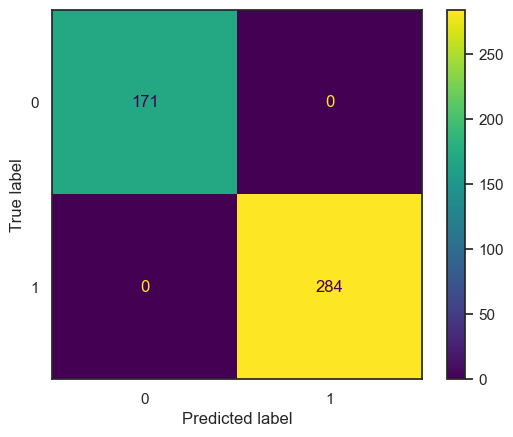

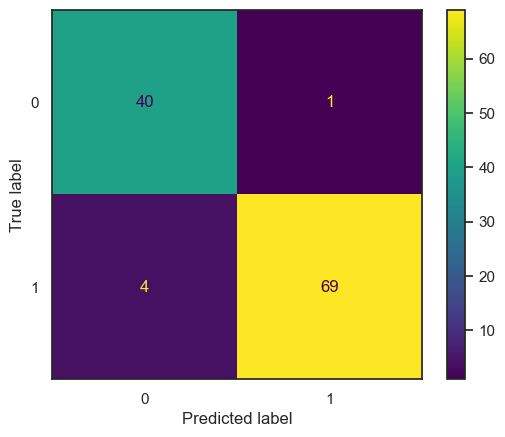

In [33]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)


 #### 4.1.6  Visualize the tree

In [51]:
# INSERT CODE TO WRITE A FUNCTION "def plot_tree(model,X,Y)" VISUALIZE THE DECISION TREE (see https://mljar.com/blog/visualize-decision-tree/ for an example)
def plot_tree(model,X,Y):
    tree.plot_tree(model, X, Y, filled=True)

plot_tree(model, x, y)

TypeError: too many positional arguments

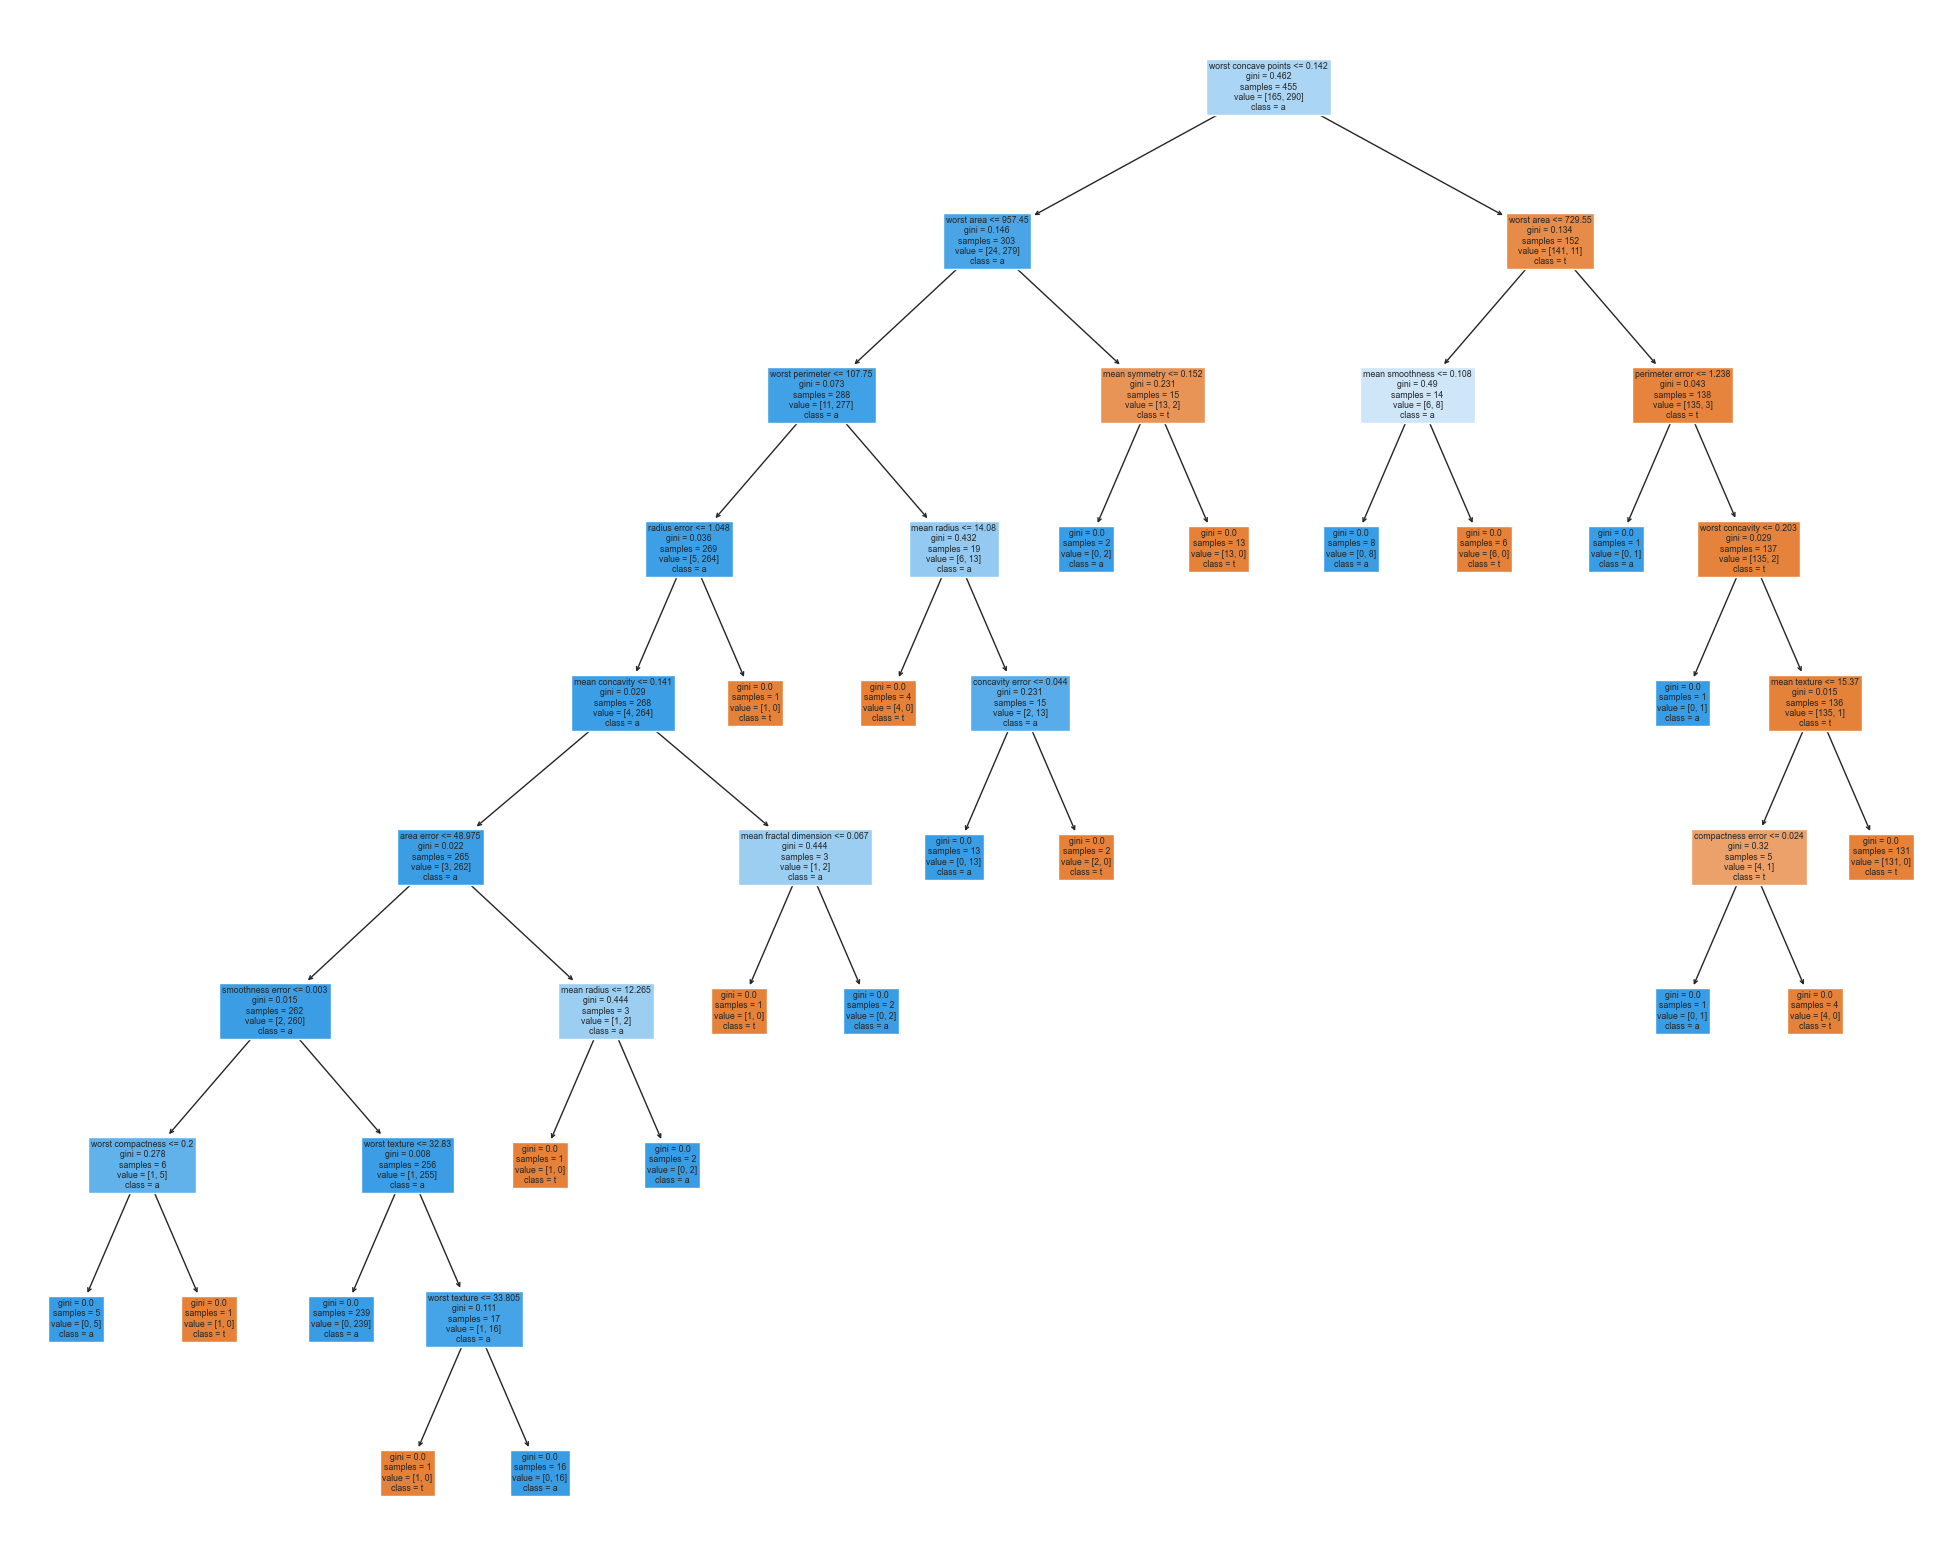

In [128]:
# INSERT CODE TO WRITE A FUNCTION "def plot_tree(model,X,Y)" VISUALIZE THE DECISION TREE (see https://mljar.com/blog/visualize-decision-tree/ for an example)
def plot_tree(model,X,Y):
    tree.plot_tree(model, X, Y, filled = True)

 #### 4.1.6  Hyper-parameter turning

The "max_depth" hyper-parameter lets us control the number of layers in our tree.

Lets iterate over "max_depth" and try to find the set of hyper-parameters with the lowest training AND test error.

In [129]:
# COMPLETE THE FOLLOWING CODE TO LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(INSERT_CODE)

    yp_train=model.predict(INSERT_CODE)
    yp_test=model.predict(INSERT_CODE)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append(INSERT_CODE)


In [ ]:
# INSERT CODE TO GENERATE THE THREE PLOTS BELOW (SEE EXPECTED OUTPUT FOR EXAMPLE)


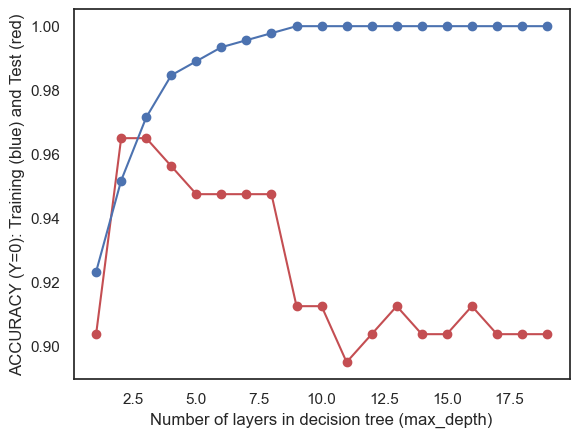

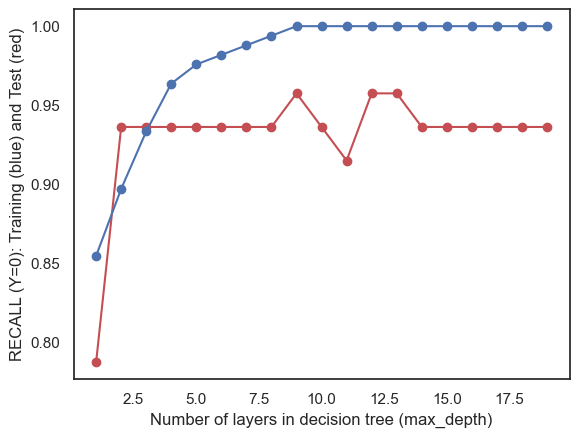

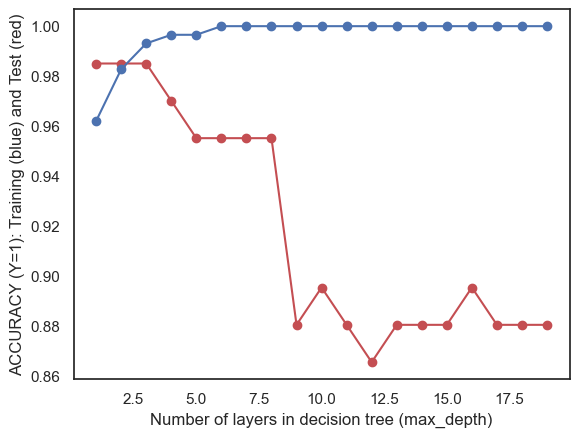

In [130]:
# INSERT CODE TO GENERATE THE THREE PLOTS BELOW (SEE EXPECTED OUTPUT FOR EXAMPLE)

# NOTE: THERE IS A TYPO IN THE THIRD PLOT, IT SHOULD BE RECALL IN THE Y-AXIS LABEL NOT ACCURACY

 #### 4.1.7 Train optimal model 
 
 Re-train the decision tree using the optimal hyper-parameter obtained from the plot above
 

In [ ]:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=4)
model = model.fit(x_train, y_train)

yp_train=model.predict(INSERT_CODE)
yp_test=model.predict(INSERT_CODE)

In [131]:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=INSERT_CODE)
model = model.fit(x_train, y_train)

yp_train=model.predict(INSERT_CODE)
yp_test=model.predict(INSERT_CODE)

------TRAINING------
ACCURACY: 0.9714285714285714
NEGATIVE RECALL (Y=0): 0.9333333333333333
NEGATIVE PRECISION (Y=0): 0.9871794871794872
POSITIVE RECALL (Y=1): 0.993103448275862
POSITIVE PRECISION (Y=1): 0.9632107023411371
[[154  11]
 [  2 288]]


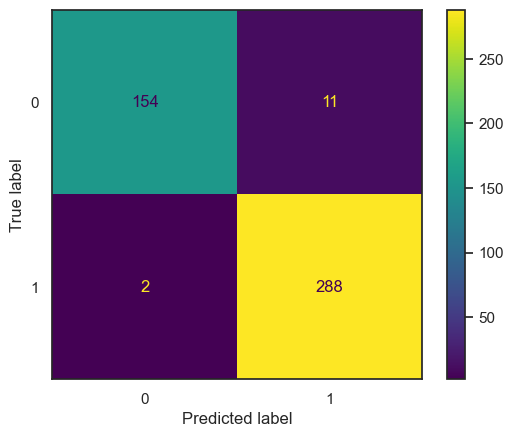

------TEST------
ACCURACY: 0.9649122807017544
NEGATIVE RECALL (Y=0): 0.9361702127659575
NEGATIVE PRECISION (Y=0): 0.9777777777777777
POSITIVE RECALL (Y=1): 0.9850746268656716
POSITIVE PRECISION (Y=1): 0.9565217391304348
[[44  3]
 [ 1 66]]


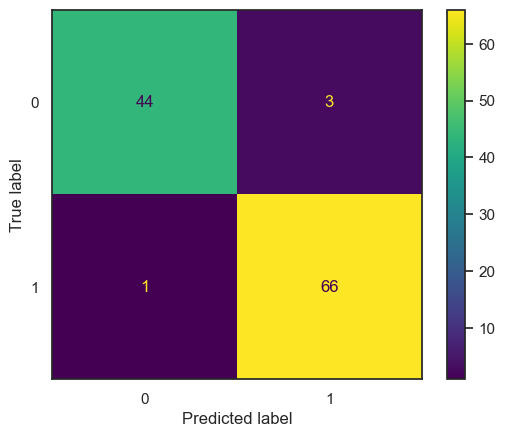

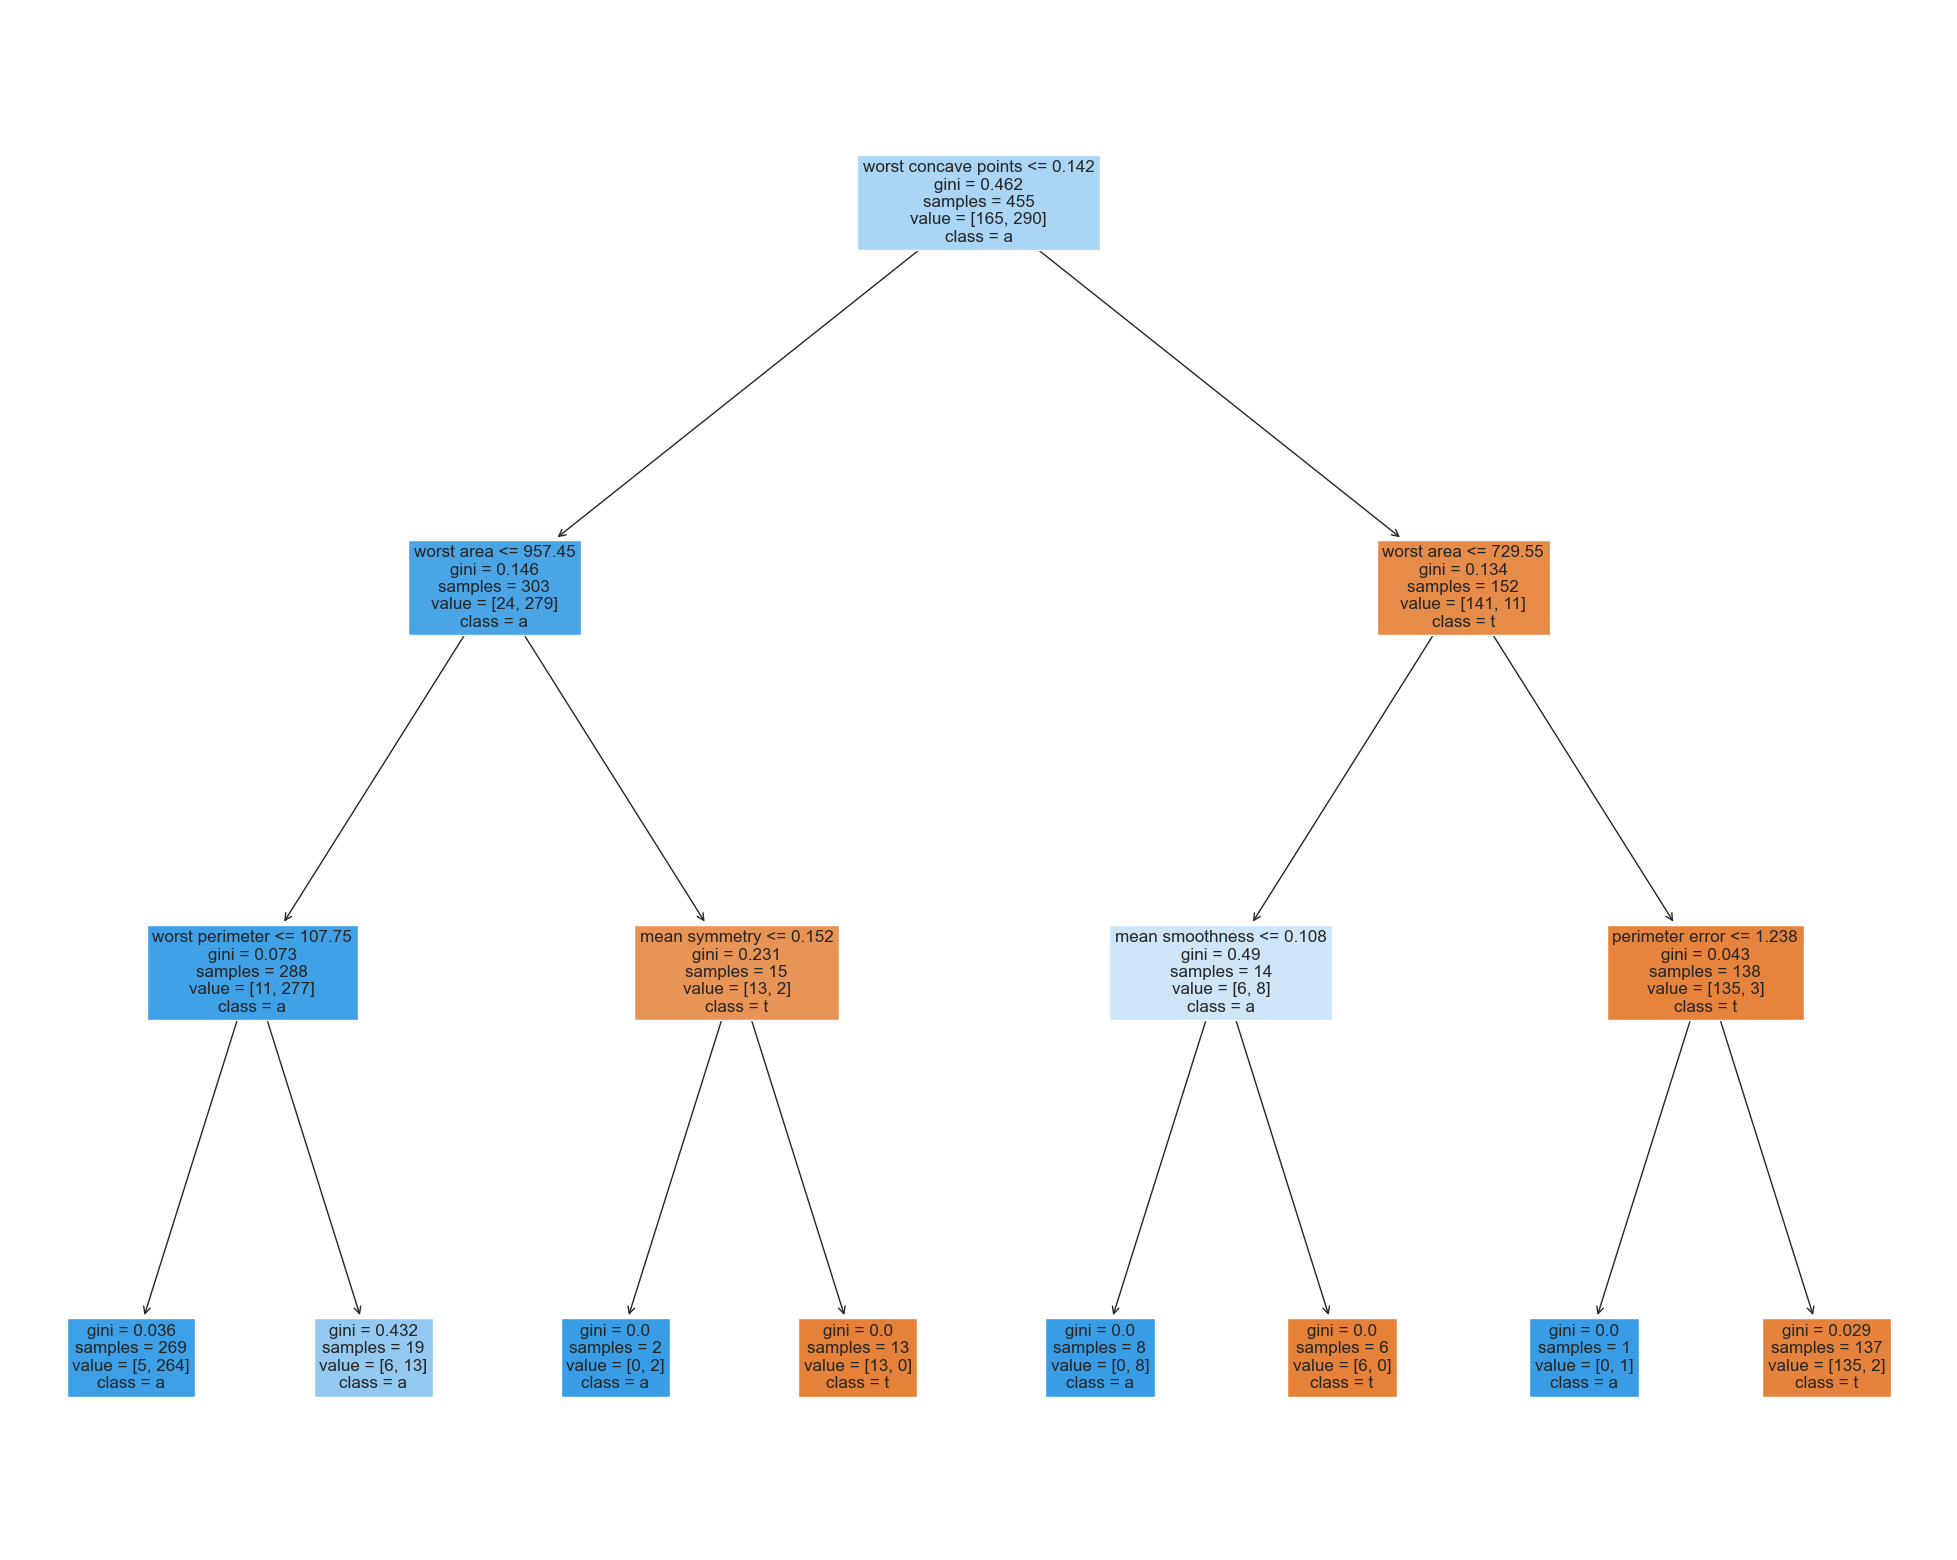

In [132]:
# RUN THE FOLLOWING CODE TO EVALUATE YOUR MODEL
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,x,y)
